# Artificial Neural Networks (ANN)

Neural networks are machine learning models that can be used to approximate any non-linear function. In this tutorial, we will first go through an example of how neural networks can be implemented in tensorflow (based on this [notebook](https://github.com/ageron/handson-ml3/blob/main/10_neural_nets_with_keras.ipynb) from Géron), and then look at an example of applying a neural network to a climate data set.

## Implementing MLP's with sci-kit learn

First, we will look at using `sci-kit learn` to implement a Multi-layer Perceptron (MLP) on the Iris data set.

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

The Iris data set is a simple example data that includes values for 4 features:
~~~
-sepal length (cm)
-sepal width (cm)
-petal length (cm)
-petal width (cm)
~~~
for labeled data sets of 3 different iris types ['setosa', 'versicolor', 'virginica']. The problem is to classify each sample as belonging to one of these 3 iris types, based on the values of these 4 features.

In [2]:
iris = load_iris()

In [3]:
X_train_full, X_test, y_train_full, y_test = train_test_split(
    iris.data, iris.target, test_size=0.1, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.1, random_state=42)

In the `sci-kit learn` implementation, we need to specify whether we are training an MLP for classification or regression. Here we use the `MLPClassifier` since we are interested in classifying each sample as belonging to one of the 3 iris types.

We can specify a number of hyper-parameters for the MLPClassifier:
- hidden_layer_sizes : the number of neurons in the ith hidden layer
- activation: the activation function to use. The default is relu
- max_iter : the maximum number of iterations
- etc.

In [4]:
mlp_clf = MLPClassifier(hidden_layer_sizes=[5], max_iter=10_000,
                        random_state=42)

In [5]:
pipeline = make_pipeline(StandardScaler(), mlp_clf)
pipeline.fit(X_train, y_train)
accuracy = pipeline.score(X_valid, y_valid)
accuracy

1.0

In [6]:
mlp_clf

MLPClassifier(hidden_layer_sizes=[5], max_iter=10000, random_state=42)

## Implementing MLP's with Keras/Tensorflow
We would generally not use `sci-kit learn` to implement a neural network, because we don't have nearly as much flexibility to customize our deep learning models with this library as we do with libraries that are specifically developed for deep learning. Instead, we will use `Tensorflow` with its `Keras` backend as a deep learning library. 

To start, we will use a simple example of using the fashion MNIST data set (this is a simple example data set that includes examples of images of different items of clothing labeled by the type of clothing). We will just use this as an example for how one sets up and trains a machine learning model in `Tensorflow`


In [8]:
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [9]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

The training set contains 60,000 grayscale images, each 28x28 pixels.

In [10]:
X_train.shape

(55000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255):

In [11]:
X_train.dtype

dtype('uint8')

Let's scale the pixel intensities down to the 0-1 range and convert them to floats, dividing by 255:

In [12]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

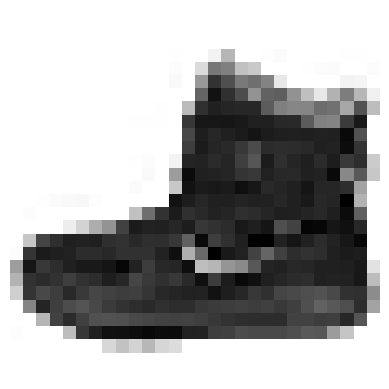

In [13]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

The labels are the class IDS, from 0 to 9:

In [14]:
y_train

array([9, 0, 0, ..., 9, 0, 2], dtype=uint8)

The corresponding class names are 

In [15]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

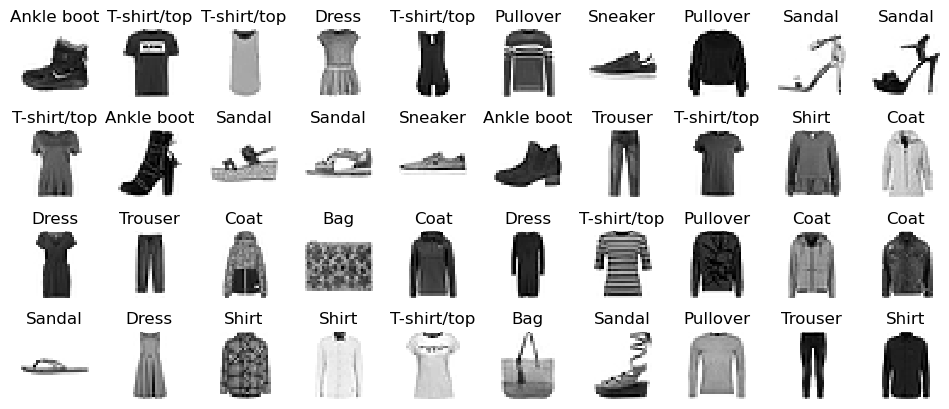

In [16]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()

## Creating the model using the sequential API

In [18]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=[28, 28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [19]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [22]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [22]:
model.get_layer('dense') is hidden1

True

In [28]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.0375312 , -0.01866168,  0.01203875, ...,  0.00608955,
         0.02472468, -0.00356066],
       [ 0.05250382,  0.0251855 , -0.07069854, ...,  0.04000787,
         0.01284705,  0.03043259],
       [ 0.0545118 ,  0.03892143,  0.00229063, ...,  0.06401411,
        -0.01238985,  0.05261819],
       ...,
       [ 0.02951062, -0.07138415, -0.05407264, ...,  0.02096668,
        -0.05056246,  0.00250109],
       [ 0.05144951, -0.05055304, -0.03714174, ...,  0.02850722,
         0.01339265, -0.04779747],
       [-0.05961955, -0.03354564, -0.02524402, ...,  0.01388844,
         0.01900666,  0.03723662]], dtype=float32)

In [24]:
weights.shape

(784, 300)

In [27]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [26]:
biases.shape

(300,)

## Compiling the model

In [29]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [30]:
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=[tf.keras.metrics.sparse_categorical_accuracy])

## Training and evaluating the model

In [31]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.9994 - sparse_categorical_accuracy: 0.6900 - val_loss: 0.5030 - val_sparse_categorical_accuracy: 0.8220
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.5041 - sparse_categorical_accuracy: 0.8263 - val_loss: 0.4565 - val_sparse_categorical_accuracy: 0.8350
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.4533 - sparse_categorical_accuracy: 0.8435 - val_loss: 0.4332 - val_sparse_categorical_accuracy: 0.8454
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.4233 - sparse_categorical_accuracy: 0.8535 - val_loss: 0.4168 - val_sparse_categorical_accuracy: 0.8516
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.4016 - sparse_categorical_accuracy: 0.8602 - val_loss: 0.4058 - val_sparse_categorical_accuracy: 0.8538
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.3847 - sparse_categorical_accuracy: 0.8650 - val_loss: 0.3962 - val_sparse_categorical_accuracy

In [32]:
history.params

{'verbose': 'auto', 'epochs': 30, 'steps': 1719}

In [33]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


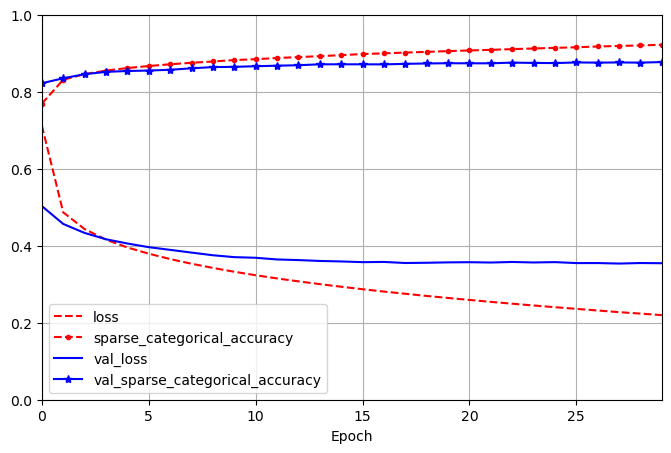

In [34]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left")  # extra code

plt.show()

In [35]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3681 - sparse_categorical_accuracy: 0.8740


[0.3683154881000519, 0.8734999895095825]

## Using the model to make predictions

In [36]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.25, 0.  , 0.01, 0.  , 0.74],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [37]:
y_pred = y_proba.argmax(axis=-1)
y_pred

array([9, 2, 1])

In [38]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [39]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

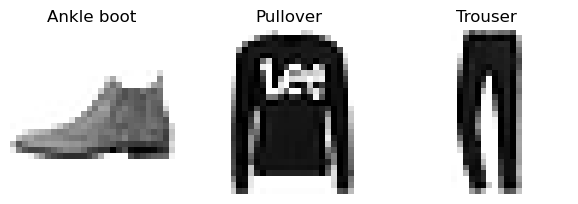

In [40]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()